# examine photometric zero-point offsets

In [1]:
import numpy as np
from astropy.table import Table

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
offsets = Table.read('/Users/hahnchanghoon/data/pfs/s23b/s23b_stellar_offsets.csv.gz', format='csv') 

In [5]:
offsets

# skymap_id,tract,patch,ra,dec,g_mag_offset,r_mag_offset,i_mag_offset,z_mag_offset,y_mag_offset
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
100400000,10040,0,128.67909369570216,2.974488973399613,0.01508,-0.00365,-0.013203,0.00095,0.01023
100400001,10040,1,128.67924941763795,3.158782659038344,-0.0083,0.00405,-0.01887,0.00674,0.00015
100400002,10040,2,128.67940717706918,3.3454209674898396,-0.00094,0.00098,-0.0127362,0.00176,0.006315
100400003,10040,3,128.67956500329163,3.5320671979434826,0.005,-0.00073,-0.0126126,0.00119,0.009825
100400004,10040,4,128.67972289634767,3.7187173893887153,-0.01684,0.00601,-0.0153774,0.00464,0.00093
100400005,10040,5,128.67988085627974,3.9053675803105774,0.00124,0.00071,-0.0142734,0.00331,0.00591
100400006,10040,6,128.68003888313032,4.092013809194168,-0.00292,0.00211,-0.0167376,0.00521,-0.00033
100400007,10040,7,128.680196976942,4.278652115029111,-0.01908,0.00778,-0.0221556,0.0091,-0.00156
100400008,10040,8,128.6803531603334,4.462945797057344,-0.02518,0.00855,-0.0161634,0.00376,0.00759


Text(0, 0.5, 'Dec')

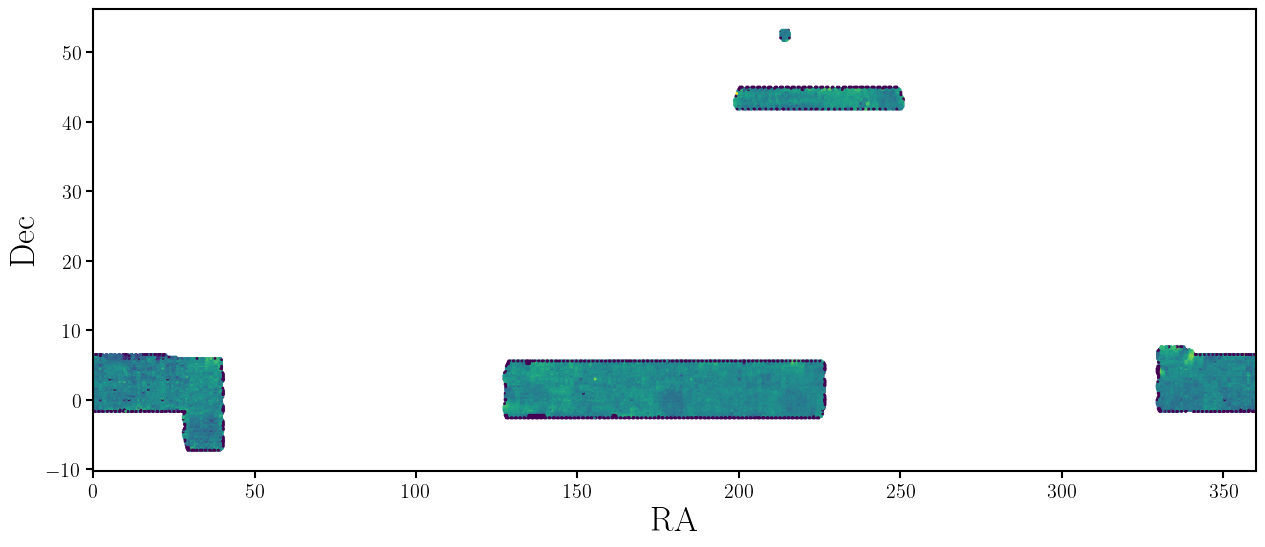

In [16]:
fig = plt.figure(figsize=(15, 6))
sub = fig.add_subplot(111)
sub.scatter(offsets['ra'], offsets['dec'], c=offsets['g_mag_offset'], vmin=-0.1, vmax=0.1, s=1) 
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(0, 360)
sub.set_ylabel('Dec', fontsize=25)

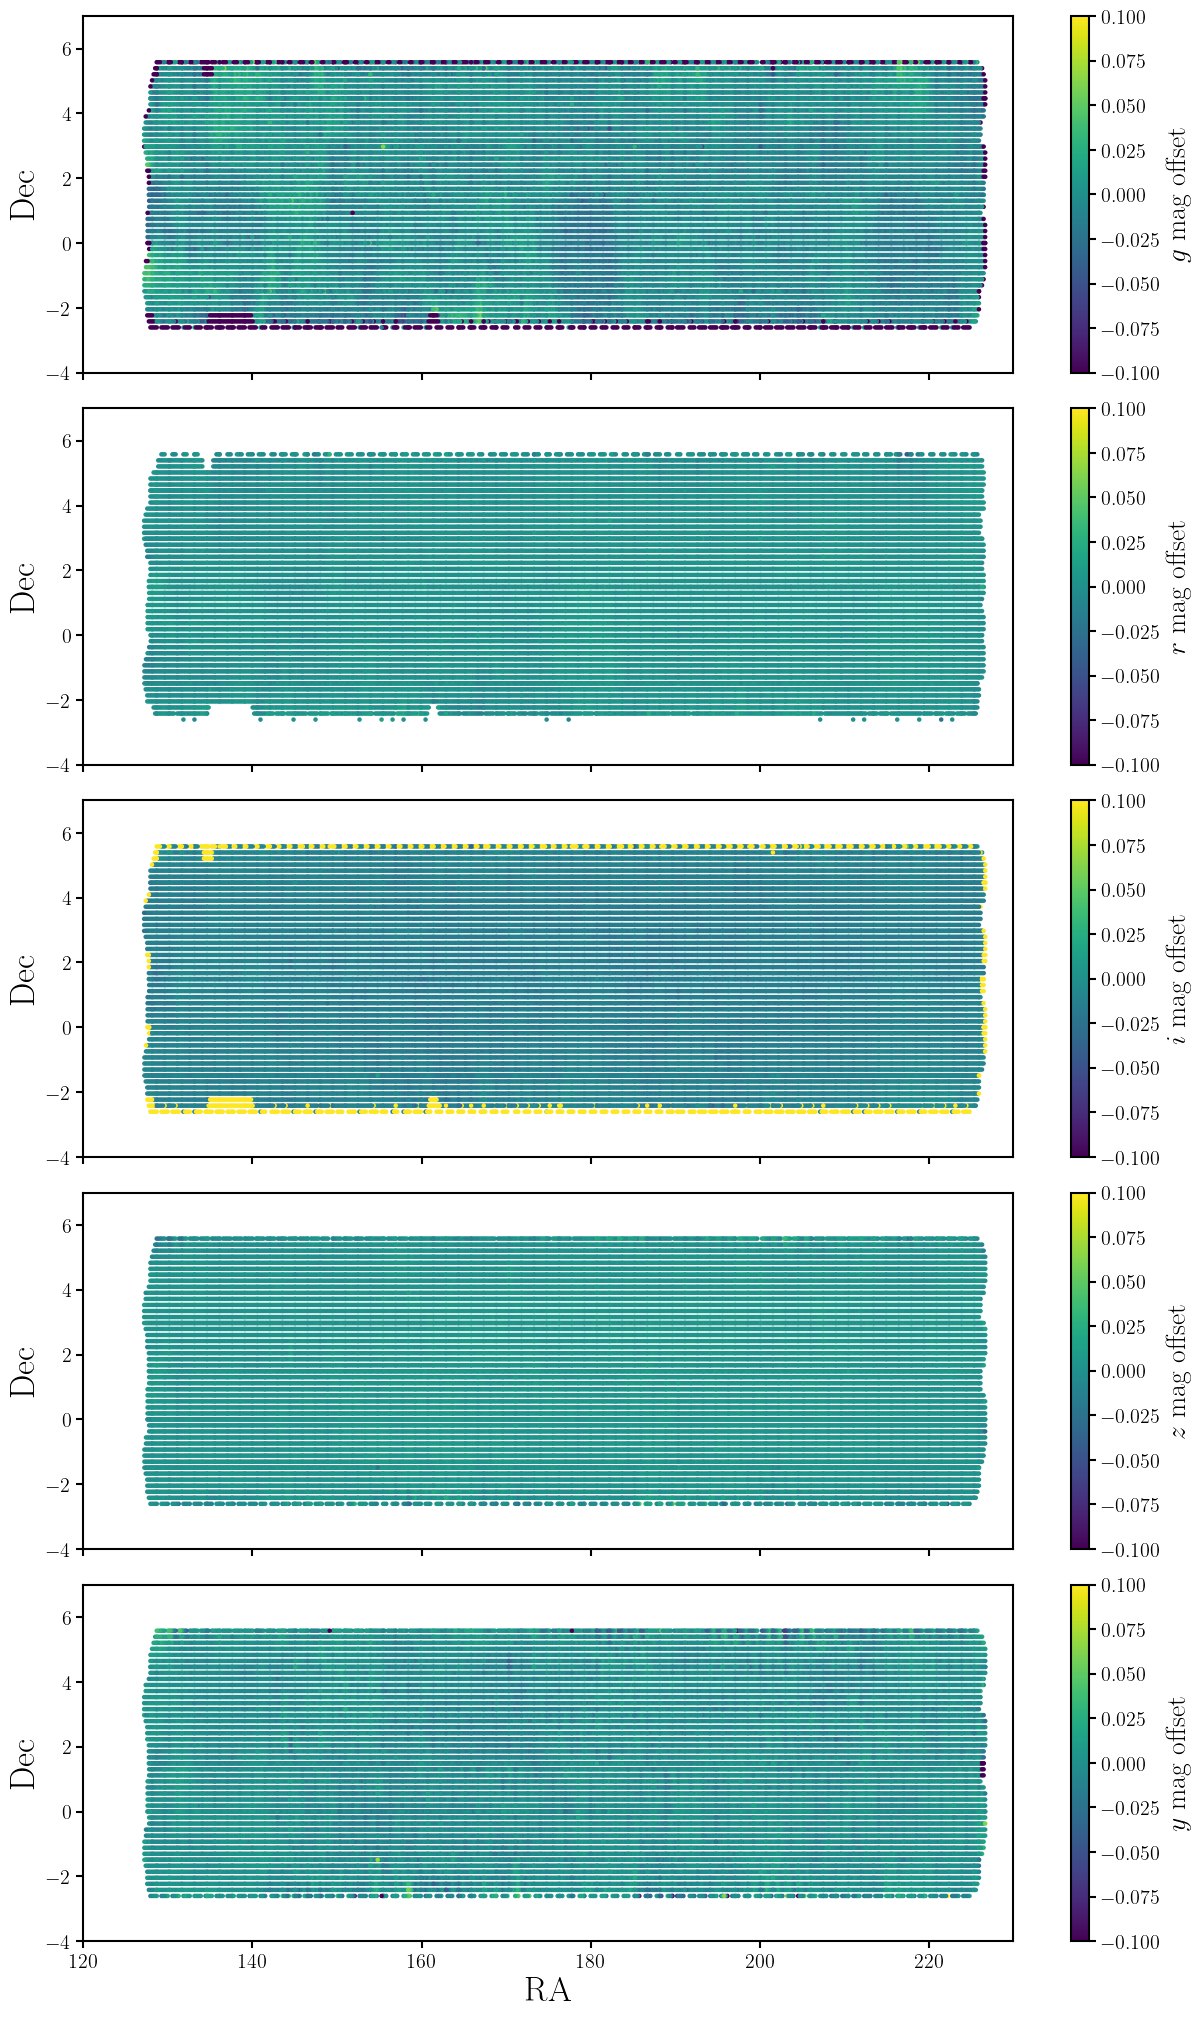

In [41]:
fig = plt.figure(figsize=(15, 25))
for i, band in enumerate(['g', 'r', 'i', 'z', 'y']):
    sub = fig.add_subplot(5,1,i+1)
    _plt = sub.scatter(offsets['ra'], offsets['dec'], c=offsets[f'{band}_mag_offset'], vmin=-0.1, vmax=0.1, s=5) 
    if i < 4: 
        sub.set_xticklabels([]) 
    else: sub.set_xlabel('RA', fontsize=25)
    sub.set_xlim(120, 230)
    sub.set_ylabel('Dec', fontsize=25)
    sub.set_ylim(-4, 7)
    
    cb = plt.colorbar(_plt, ax=sub)
    cb.set_label(label=f'${band}$ mag offset', fontsize=20)
fig.subplots_adjust(hspace=0.1)